<a href="https://colab.research.google.com/github/AchiniR/3D-car-simulator/blob/main/DM_project_G7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset
#https://www.kaggle.com/datasets/jhajalaj/netflix-india-shows-and-movies/data

# Ref
#https://www.kaggle.com/code/bansodesandeep/netflix-movies-and-tv-shows-clustering/notebook#4.-Cleaning-data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [3]:
# reading data
path = '/content/drive/MyDrive/DM_prroject/netflix_india_shows_and_movies.csv'

original_df = pd.read_csv(path,index_col='showid')
df = original_df.copy()

In [4]:
df.head()

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
81607354,A Killer Paradox,TVSeries,A,1 Season,"When one accidental killing leads to another, ...",NaN,Thriller,2024.0,2024-2-9,Offbeat;Suspenseful,Choi Woo-shik;Son Suk-ku;Lee Hee-jun,Lee Chang-hee;Kim Da-min,NaN,NaN,NaN,Korean;Crime TV Shows;K-dramas based on Webtoo...,81444051;81461539;81011211;81640988;80990668;8...,South Korea
81616617,Ashes,Movie,A,1.6667,From an intoxicating fantasy to a dangerous af...,NaN,Drama,2024.0,2024-2-9,Psychological;Intimate;Romantic,Funda Eryiğit;Alperen Duymaz;Mehmet Günsür;Nur...,NaN,Erdem Tepegöz,English;Turkish - Audio Description;Turkish [O...,English;English;Turkish,Turkish;Dramas;Romantic Movies,81732726;81256740;81671215;81637260;81566662;8...,Turkey
81732726,Bhakshak,Movie,A,2.25,A struggling local journalist begins a dogged ...,NaN,Drama,2024.0,2024-2-9,Gritty,Bhumi Pednekar;Sanjay Mishra;Aditya Srivastava...,NaN,Pulkit,English;Hindi - Audio Description;Hindi [Origi...,English;English;Hindi,Hindi-Language Movies;Bollywood Movies;Crime M...,81671215;81637260;81725616;81637261;81740214;8...,India
81611991,"Lover, Stalker, Killer",Movie,U/A 16+,1.5,"In this twisting documentary, a mechanic tries...",NaN,Documentary,2024.0,2024-2-9,NaN,NaN,NaN,Sam Hobkinson,English - Audio Description;English [Original],English,Documentaries;Crime Movies;True Crime Document...,81671836;81130130;81620852;81607097;81212487;8...,NaN
70305903,Interstellar,Movie,U/A 13+,2.8167,With humanity teetering on the brink of extinc...,NaN,Sci-Fi,2014.0,2024-2-9,Mind-Bending;Cerebral,Matthew McConaughey;Anne Hathaway;Jessica Chas...,NaN,Christopher Nolan,English [Original],English;Hindi,Sci-Fi Movies;Dramas;Action & Adventure Movies...,70131314;81198930;80117456;80023689;80244645;8...,United States


In [5]:
df.shape

(6698, 18)

In [6]:
df.describe()

,release_year
count,6685.000000
mean,2018.318175
std,6.092007
min,1945.000000
25%,2017.000000
50%,2020.000000
75%,2022.000000
max,2024.000000


In [7]:
# unique values in each column
df.nunique()

name                  6626
type                     2
rating                   5
duration               205
description           6559
hook_text             3119
genre                   20
release_year            56
release_date          1845
mood_tag               987
actors                5694
creator               1061
director              3096
audio                  261
subtitles              125
tags                  3484
similar_titles_id     6685
production_country      57
dtype: int64

In [8]:
# calculating missing values
missing_values = df.isnull()
total_missing_values = missing_values.sum()
print(total_missing_values)

name                     0
type                     0
rating                   0
duration                 0
description              0
hook_text             3533
genre                    0
release_year            13
release_date             0
mood_tag               647
actors                 667
creator               5524
director              2438
audio                 2700
subtitles             2701
tags                     0
similar_titles_id       11
production_country     554
dtype: int64


In [9]:
#count #of non null values
df.notnull().sum()

name                  6698
type                  6698
rating                6698
duration              6698
description           6698
hook_text             3165
genre                 6698
release_year          6685
release_date          6698
mood_tag              6051
actors                6031
creator               1174
director              4260
audio                 3998
subtitles             3997
tags                  6698
similar_titles_id     6687
production_country    6144
dtype: int64

In [10]:
# Checking for duplicate records
df.duplicated().value_counts()

False    6698
dtype: int64

No duplicates found


In [11]:
df[df[['hook_text']].notnull().all(1)]


,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
81223055,Dee & Friends in Oz,TVSeries,U,2 Seasons,When a mysterious key transports her to the la...,"A magical, musical adventure for preschoolers ...",Kids,2024.0,2024-2-5,NaN,Layla Capers;LaChanze Sapp-Gooding;Rodney Saul...,Angela C. Santomero,NaN,NaN,NaN,Kids' TV;Kids Music;TV Cartoons,80166314;81566662;81476885;81279322;81719217;8...,NaN
81754782,Salaar (English),Movie,A,2.9167,The fate of a violently contested kingdom hang...,"This action epic stars Prabhas (""Baahubali""), ...",Action,2023.0,2024-2-5,Violent,Prabhas;Prithviraj Sukumaran;Shruthi Haasan;Ja...,NaN,Prashanth Neel,English,English;English,Crime Movies;Action & Adventure Movies,81732726;81727155;81671215;81639323;81436990;8...,NaN
70243456,The Guilt Trip,Movie,U/A 13+,1.6,Andy and his mom Joyce both have emotional bag...,Seth Rogen and Academy Award winner Barbra Str...,Comedy,2012.0,2024-2-3,Sentimental;Heartfelt;Feel-Good,Barbra Streisand;Seth Rogen;Julene Renee;Zabry...,NaN,Anne Fletcher,English - Audio Description;English [Original],English;Hindi,Comedy Movies;US Movies,81731618;80174897;80220496;81034895;80240954;8...,United States
70031975,Black,Movie,U/A 13+,2.0667,"Unable to see, hear or speak after a childhood...",Sanjay Leela Bhansali’s National Award-winning...,Drama,2005.0,2024-2-3,Inspiring;Emotional,Amitabh Bachchan;Rani Mukerji;Shernaz Patel;Ay...,NaN,Sanjay Leela Bhansali,Hindi [Original],English,Hindi-Language Movies;Bollywood Movies;Dramas,81732726;81671215;81637260;81740214;81718224;8...,India
70221402,Regular Show,TVSeries,U/A 13+,3 Seasons,Oddball best friends Mordecai and Rigby pass t...,This campy animated series won an Emmy in 2012...,Comedy,2010.0,2024-2-2,Absurd,J.G. Quintel;William Salyers;Sam Marin;Mark Ha...,J.G. Quintel,NaN,NaN,NaN,Family Watch Together TV;TV Comedies;US TV Shows,70243420;80014749;70241425;80995819;80166314;8...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80050006,I'm Brent Morin,Movie,A,1.1167,"In a witty solo show, Brent Morin serves up in...","A frequent guest on ""Conan,"" actor and comedia...",Comedy,2015.0,2015-12-1,Raunchy,Brent Morin,NaN,Lance Bangs,English [Original],English,Stand-Up Comedy,80192842;81613448;81613412;81635847;80223685;8...,NaN
70308278,Mission Blue,Movie,U/A 7+,1.5667,This documentary follows oceanographer Sylvia ...,"Oscar-winning director James Cameron (""Titanic...",Documentary,2014.0,2015-11-30,Provocative;Inspiring,James Cameron;Michael deGruy;Sylvia Earle;Bryc...,NaN,Robert Nixon;Fisher Stevens,English [Original],English,Documentaries;Nature & Ecology Documentaries;S...,80168188;80049832;81276049;81014008;80216393;8...,United States
70264888,Black Mirror,TVSeries,A,6 Seasons,Twisted tales run wild in this mind-bending an...,"This cult-favorite series has won six Emmys, i...",Drama,2011.0,2015-11-16,Mind-Bending;Ominous,Jesse Plemons;Cristin Milioti;Jimmi Simpson;Mi...,Charlie Brooker,NaN,NaN,NaN,TV Dramas;Sci-Fi TV;US TV Shows;TV Thrillers,80988062;80991826;80174608;81483047;81288179;8...,United States


In [12]:
df[['hook_text']].notnull().all(1).count()

6698

Only 5 columns have hook test. So it doesn't make any sense to keep the column

In [13]:
df[['creator']].notnull().all(1).count()

6698

In [14]:
df[df[['creator']].notnull().all(1)]

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,creator,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,,
81607354,A Killer Paradox,TVSeries,A,1 Season,"When one accidental killing leads to another, ...",NaN,Thriller,2024.0,2024-2-9,Offbeat;Suspenseful,Choi Woo-shik;Son Suk-ku;Lee Hee-jun,Lee Chang-hee;Kim Da-min,NaN,NaN,NaN,Korean;Crime TV Shows;K-dramas based on Webtoo...,81444051;81461539;81011211;81640988;80990668;8...,South Korea
81256740,One Day,TVSeries,A,1 Season,"After spending graduation night together, Emma...",NaN,Romance,2024.0,2024-2-8,Nostalgic;Bittersweet;Intimate,Ambika Mod;Leo Woodall;Essie Davis;Tim McInner...,Nicole Taylor,NaN,NaN,NaN,Romantic TV Dramas;TV Dramas;British;TV Shows ...,70128698;81447264;81616617;81435930;81732726;8...,United Kingdom
81423569,An Incurable Case of Love,TVSeries,U/A 16+,1 Season,Nanase fell in love with Dr. Tendo five years ...,NaN,Romance,2020.0,2024-2-8,Swoonworthy;Charming;Feel-Good,Mone Kamishiraishi;Takeru Satoh;Katsuya Maigum...,Arisa Kaneko,NaN,NaN,NaN,Medical TV Shows;Romantic TV Dramas;TV Dramas;...,81137509;81665637;81697985;81642980;81742988;8...,Japan
81223055,Dee & Friends in Oz,TVSeries,U,2 Seasons,When a mysterious key transports her to the la...,"A magical, musical adventure for preschoolers ...",Kids,2024.0,2024-2-5,NaN,Layla Capers;LaChanze Sapp-Gooding;Rodney Saul...,Angela C. Santomero,NaN,NaN,NaN,Kids' TV;Kids Music;TV Cartoons,80166314;81566662;81476885;81279322;81719217;8...,NaN
70221402,Regular Show,TVSeries,U/A 13+,3 Seasons,Oddball best friends Mordecai and Rigby pass t...,This campy animated series won an Emmy in 2012...,Comedy,2010.0,2024-2-2,Absurd,J.G. Quintel;William Salyers;Sam Marin;Mark Ha...,J.G. Quintel,NaN,NaN,NaN,Family Watch Together TV;TV Comedies;US TV Shows,70243420;80014749;70241425;80995819;80166314;8...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70272742,Justin Time,TVSeries,U,2 Seasons,"In Justin's dreams, he and his imaginary frien...",NaN,Kids,2011.0,2015-12-31,Feel-Good,Gage Munroe;Scott McCord;Jenna Warren,Brandon James Scott,NaN,NaN,NaN,Kids' TV;Canadian;Education for Kids;TV Cartoons,80087548;80227818;80108159;81014532;80108373;8...,Canada
80002479,Peaky Blinders,TVSeries,A,6 Seasons,"A notorious gang in 1919 Birmingham, England, ...",Won a BAFTA for Best Drama Series. Cillian Mur...,Drama,2013.0,2015-12-31,Violent,Cillian Murphy;Sam Neill;Helen McCrory;Paul An...,Steven Knight,NaN,NaN,NaN,TV Dramas;British;Period Pieces;Crime TV Shows,80234304;80175798;80025172;80117552;81149450;7...,United Kingdom
80013249,Wentworth,TVSeries,A,8 Seasons,Bea Smith is locked up while awaiting trial fo...,"Won multiple AACTA Awards, including Best TV D...",Drama,2013.0,2015-12-30,Gritty,Danielle Cormack;Nicole da Silva;Kate Atkinson...,Reg Watson;Lara Radulovich;David Hannan,NaN,NaN,NaN,TV Dramas;Australian;Crime TV Shows,70242311;81132961;80153467;80200549;80107369;8...,Australia


In [15]:
# Handling the missing values
df[['director','actors','production_country', 'hook_text', 'audio', 'subtitles', 'mood_tag']] = df[['director','actors','production_country', 'hook_text', 'audio', 'subtitles', 'mood_tag']].fillna('Unknown')
df[['similar_titles_id']] = df[['similar_titles_id']].fillna('None')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.drop('creator', axis=1)

,name,type,rating,duration,description,hook_text,genre,release_year,release_date,mood_tag,actors,director,audio,subtitles,tags,similar_titles_id,production_country
showid,,,,,,,,,,,,,,,,,
81607354,A Killer Paradox,TVSeries,A,1 Season,"When one accidental killing leads to another, ...",Unknown,Thriller,2024.0,2024-2-9,Offbeat;Suspenseful,Choi Woo-shik;Son Suk-ku;Lee Hee-jun,Unknown,Unknown,Unknown,Korean;Crime TV Shows;K-dramas based on Webtoo...,81444051;81461539;81011211;81640988;80990668;8...,South Korea
81616617,Ashes,Movie,A,1.6667,From an intoxicating fantasy to a dangerous af...,Unknown,Drama,2024.0,2024-2-9,Psychological;Intimate;Romantic,Funda Eryiğit;Alperen Duymaz;Mehmet Günsür;Nur...,Erdem Tepegöz,English;Turkish - Audio Description;Turkish [O...,English;English;Turkish,Turkish;Dramas;Romantic Movies,81732726;81256740;81671215;81637260;81566662;8...,Turkey
81732726,Bhakshak,Movie,A,2.25,A struggling local journalist begins a dogged ...,Unknown,Drama,2024.0,2024-2-9,Gritty,Bhumi Pednekar;Sanjay Mishra;Aditya Srivastava...,Pulkit,English;Hindi - Audio Description;Hindi [Origi...,English;English;Hindi,Hindi-Language Movies;Bollywood Movies;Crime M...,81671215;81637260;81725616;81637261;81740214;8...,India
81611991,"Lover, Stalker, Killer",Movie,U/A 16+,1.5,"In this twisting documentary, a mechanic tries...",Unknown,Documentary,2024.0,2024-2-9,Unknown,Unknown,Sam Hobkinson,English - Audio Description;English [Original],English,Documentaries;Crime Movies;True Crime Document...,81671836;81130130;81620852;81607097;81212487;8...,Unknown
70305903,Interstellar,Movie,U/A 13+,2.8167,With humanity teetering on the brink of extinc...,Unknown,Sci-Fi,2014.0,2024-2-9,Mind-Bending;Cerebral,Matthew McConaughey;Anne Hathaway;Jessica Chas...,Christopher Nolan,English [Original],English;Hindi,Sci-Fi Movies;Dramas;Action & Adventure Movies...,70131314;81198930;80117456;80023689;80244645;8...,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80058424,John Mulaney: The Comeback Kid,Movie,U/A 16+,1.0167,"Armed with boyish charm and a sharp wit, the f...",Unknown,Comedy,2015.0,2015-11-13,Witty,John Mulaney,Rhys Thomas,English [Original],English,Stand-Up Comedy,81619082;80238110;81060252;81471774;80223685;8...,Unknown
80151644,Puss in Book: Trapped in an Epic Tale,Movie,U/A 7+,0.5833,Puss in Boots has fallen into a magic book rul...,Unknown,Kids,NaN,1970-1-1,Goofy,Eric Bauza;Jayma Mays;Maria Bamford;Jeff Benne...,Roy Burdine;Johnny Castuciano,Unknown,Unknown,Kids' TV;Children & Family Movies;Comedy Movie...,80018988;81054409;80994695;81108751;80227574;8...,United States
80196044,The Crew,Movie,A,1.3333,"After an unexpected misstep, a crew of skilled...",French hip-hop artist Kaaris co-stars as a men...,Thriller,NaN,1970-1-1,Gritty,Sami Bouajila;Guillaume Gouix;Youssef Hajdi;Re...,Julien Leclercq,Unknown,Unknown,French;Crime Movies;Action & Adventure Movies,81175433;81079723;81446739;81721676;81115400;7...,France


In [16]:
df = df.drop(['creator', 'release_year'], axis=1)

In [17]:
# calculating missing values
missing_values = df.isnull()
total_missing_values = missing_values.sum()
print(total_missing_values)

name                  0
type                  0
rating                0
duration              0
description           0
hook_text             0
genre                 0
release_date          0
mood_tag              0
actors                0
director              0
audio                 0
subtitles             0
tags                  0
similar_titles_id     0
production_country    0
dtype: int64


Type Casting

In [18]:
print(df.dtypes)

name                  object
type                  object
rating                object
duration              object
description           object
hook_text             object
genre                 object
release_date          object
mood_tag              object
actors                object
director              object
audio                 object
subtitles             object
tags                  object
similar_titles_id     object
production_country    object
dtype: object


In [19]:
df["release_date"] = pd.to_datetime(df['release_date'])

In [20]:
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year

In [30]:
# Extract numerical part from 'duration' column
df['duration'] = df['duration'].str.extract('(\d+\.?\d*)').astype(float)

In [33]:
df.head()

,name,type,rating,duration,description,hook_text,genre,release_date,mood_tag,actors,director,audio,subtitles,tags,similar_titles_id,production_country,release_month,release_year
showid,,,,,,,,,,,,,,,,,,
81607354,A Killer Paradox,TVSeries,Adults,1.0000,"When one accidental killing leads to another, ...",Unknown,Thriller,2024-02-09,Offbeat;Suspenseful,Choi Woo-shik;Son Suk-ku;Lee Hee-jun,Unknown,Unknown,Unknown,Korean;Crime TV Shows;K-dramas based on Webtoo...,81444051;81461539;81011211;81640988;80990668;8...,South Korea,2,2024
81616617,Ashes,Movie,Adults,1.6667,From an intoxicating fantasy to a dangerous af...,Unknown,Drama,2024-02-09,Psychological;Intimate;Romantic,Funda Eryiğit;Alperen Duymaz;Mehmet Günsür;Nur...,Erdem Tepegöz,English;Turkish - Audio Description;Turkish [O...,English;English;Turkish,Turkish;Dramas;Romantic Movies,81732726;81256740;81671215;81637260;81566662;8...,Turkey,2,2024
81732726,Bhakshak,Movie,Adults,2.2500,A struggling local journalist begins a dogged ...,Unknown,Drama,2024-02-09,Gritty,Bhumi Pednekar;Sanjay Mishra;Aditya Srivastava...,Pulkit,English;Hindi - Audio Description;Hindi [Origi...,English;English;Hindi,Hindi-Language Movies;Bollywood Movies;Crime M...,81671215;81637260;81725616;81637261;81740214;8...,India,2,2024
81611991,"Lover, Stalker, Killer",Movie,Young Adults,1.5000,"In this twisting documentary, a mechanic tries...",Unknown,Documentary,2024-02-09,Unknown,Unknown,Sam Hobkinson,English - Audio Description;English [Original],English,Documentaries;Crime Movies;True Crime Document...,81671836;81130130;81620852;81607097;81212487;8...,Unknown,2,2024
70305903,Interstellar,Movie,Teens,2.8167,With humanity teetering on the brink of extinc...,Unknown,Sci-Fi,2024-02-09,Mind-Bending;Cerebral,Matthew McConaughey;Anne Hathaway;Jessica Chas...,Christopher Nolan,English [Original],English;Hindi,Sci-Fi Movies;Dramas;Action & Adventure Movies...,70131314;81198930;80117456;80023689;80244645;8...,United States,2,2024


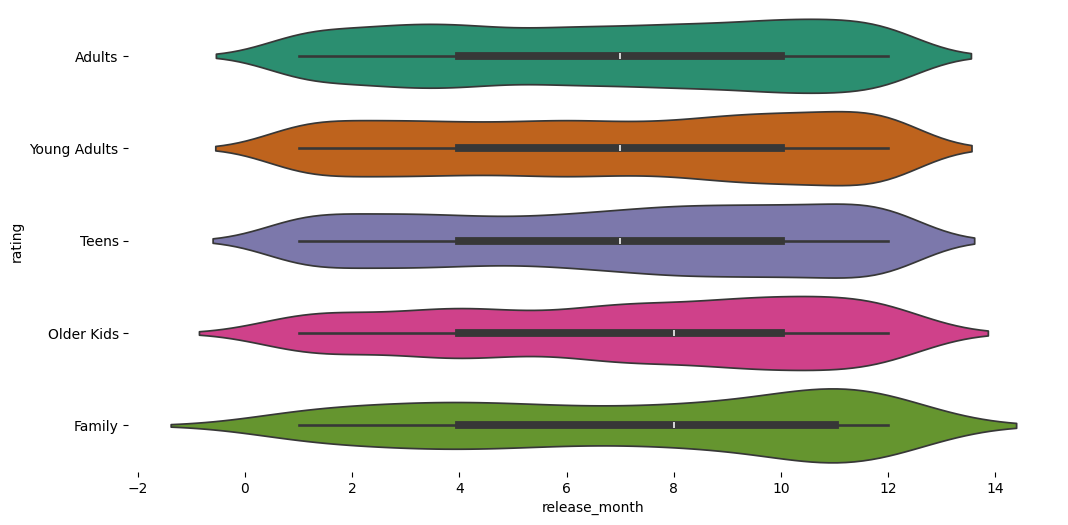

In [76]:
# @title rating vs release_month

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['rating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='release_month', y='rating', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

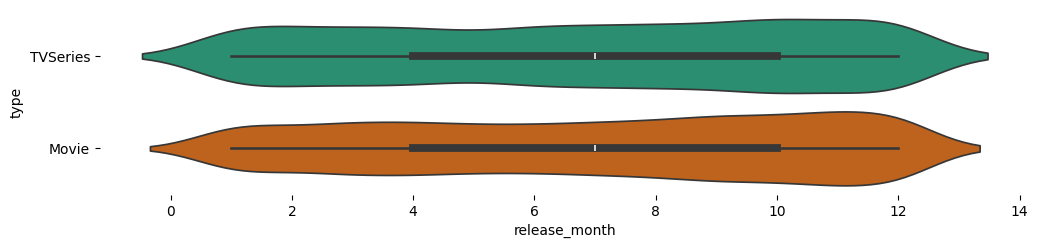

In [75]:
# @title type vs release_month

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='release_month', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [79]:
df.groupby('type')['release_month'].median()

type
Movie       7.0
TVSeries    7.0
Name: release_month, dtype: float64

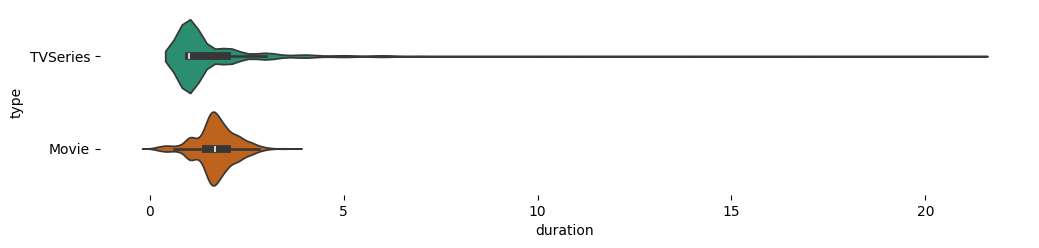

In [74]:
# @title type vs duration

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='duration', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='duration'>

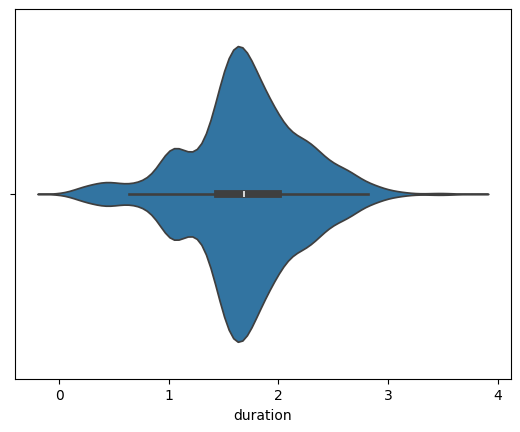

In [81]:
sns.violinplot(x=df[df['type'] == 'Movie']['duration'])

<Axes: xlabel='duration'>

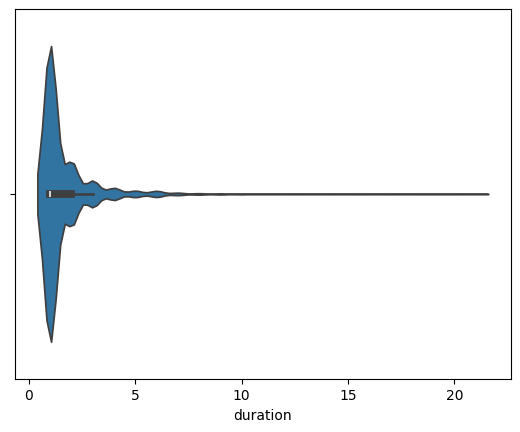

In [82]:
sns.violinplot(x=df[df['type'] == 'TVSeries']['duration'])

In [89]:
df.groupby('type')['duration'].median()

type
Movie       1.6833
TVSeries    1.0000
Name: duration, dtype: float64

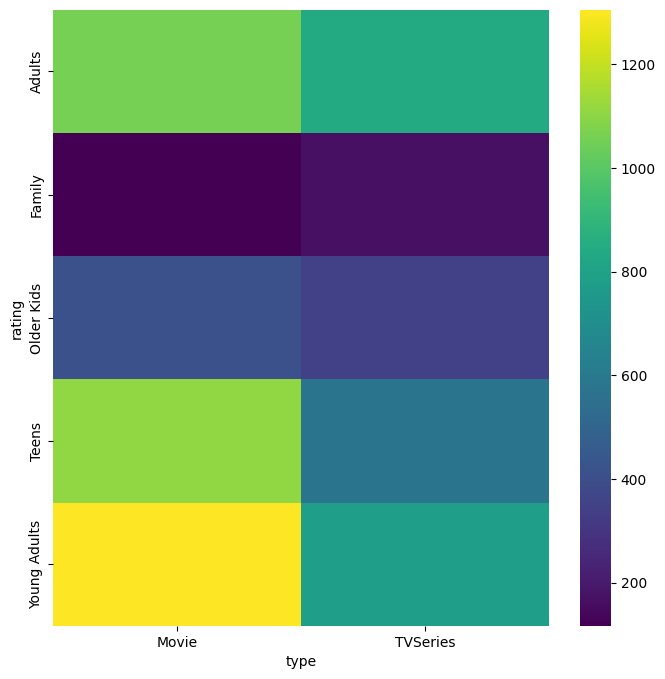

In [73]:
# @title type vs rating

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rating'].value_counts()
    for x_label, grp in df.groupby('type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('type')
_ = plt.ylabel('rating')

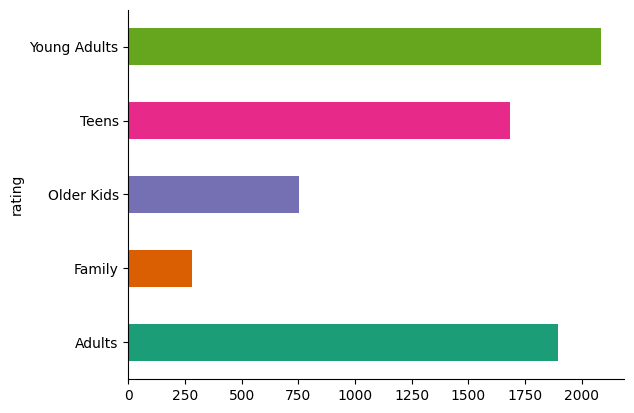

In [72]:
df.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

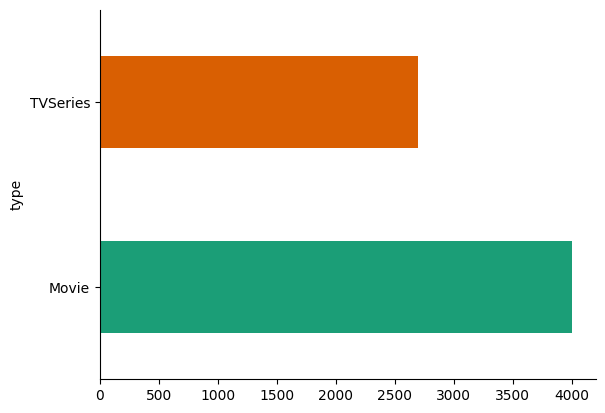

In [67]:
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [53]:
print(len(pd.unique(df['name'])))

6626


In [57]:
print(len(pd.unique(df['mood_tag'])))

988


Text(0.5, 1.0, 'Number of shows for top 20 mood tags')

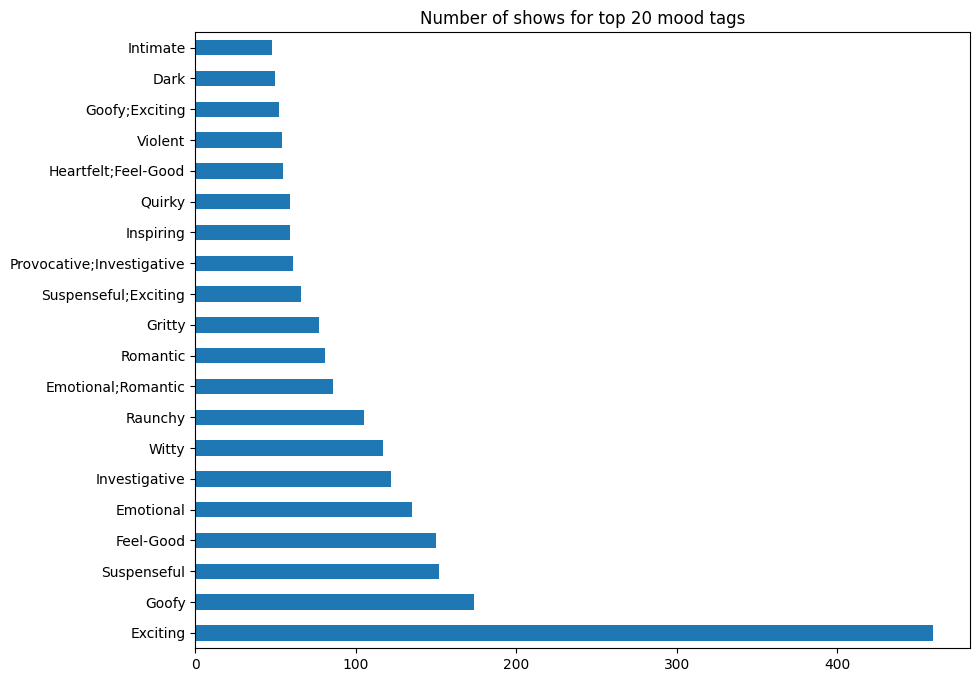

In [77]:
# Top 10 mood tags in the dataset
plt.figure(figsize=(10,8))
df[~(df['mood_tag']=='Unknown')].mood_tag.value_counts().nlargest(20).plot(kind='barh')
plt.title('Number of shows for top 20 mood tags')

<Axes: xlabel='rating', ylabel='count'>

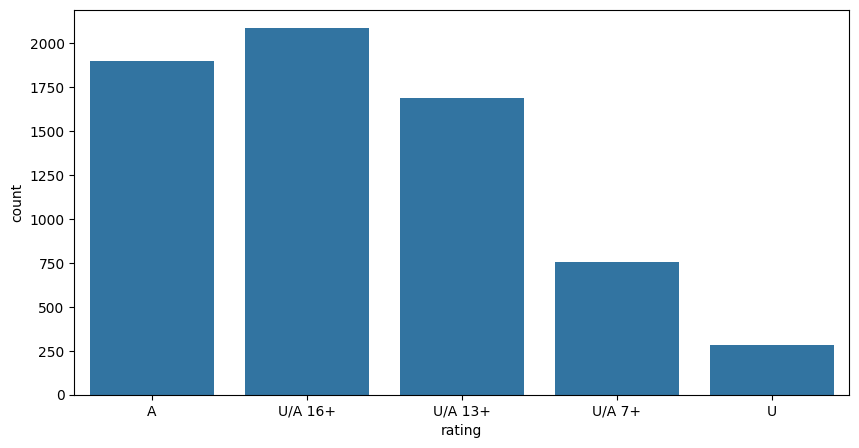

In [21]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

In [22]:
# Age ratings
df.rating.unique()

array(['A', 'U/A 16+', 'U/A 13+', 'U/A 7+', 'U'], dtype=object)

In [23]:
# source:https://fenilandbollywood.blogspot.com/2023/08/ua-7-ua-13-ua-16-guidelines-for-new.html

rating_map = {'A':'Adults',
              'U/A 16+':'Young Adults',
              'U/A 13+':'Teens',
              'U/A 7+':'Older Kids',
              'U':'Family'}

In [24]:
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adults', 'Young Adults', 'Teens', 'Older Kids', 'Family'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

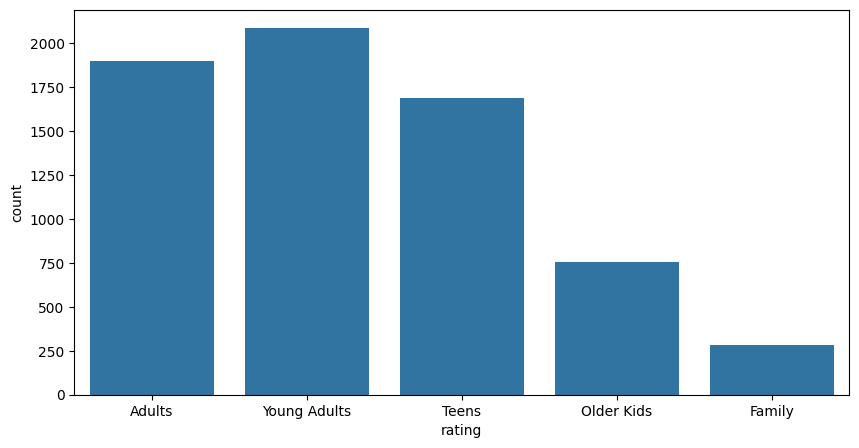

In [25]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)

Text(0.5, 1.0, 'Movies and TV Series in the dataset')

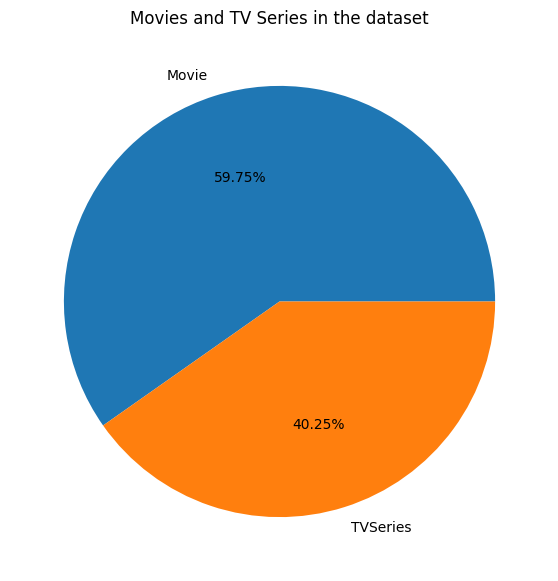

In [26]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Series in the dataset')

Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

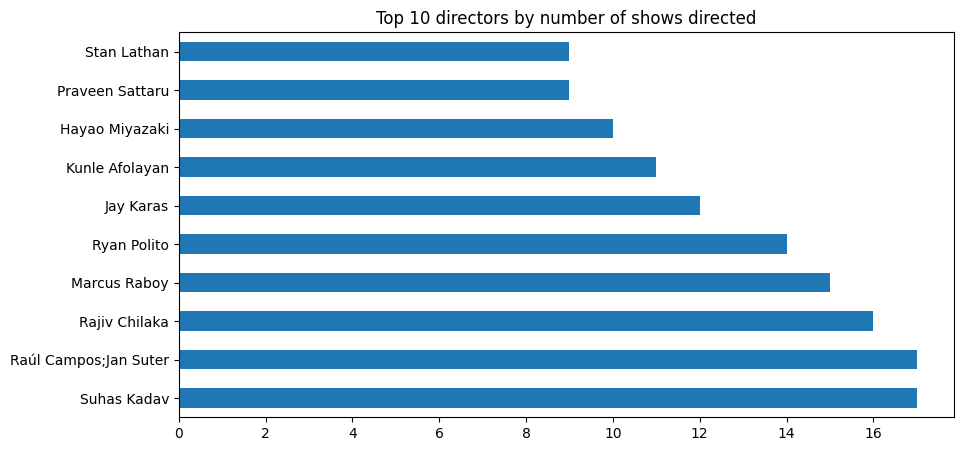

In [34]:
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

Text(0.5, 1.0, ' Top 10 countries with the highest number of shows')

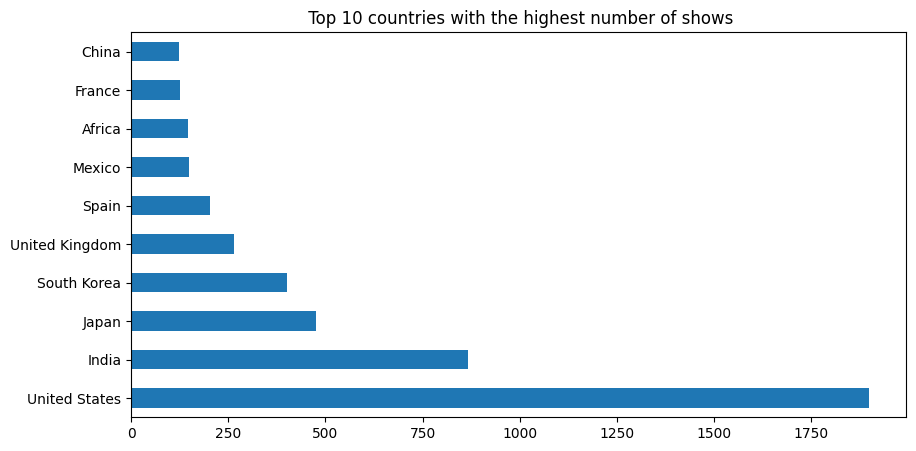

In [37]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
df[~(df['production_country']=='Unknown')].production_country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [86]:
# first and last date on which a show was added on Netflix
df.release_date.min(),df.release_date.max()

(Timestamp('1970-01-01 00:00:00'), Timestamp('2024-02-16 00:00:00'))

In [39]:
# % share of movies / tv shows by top 10 countries
df.production_country.value_counts().nlargest(10).sum()/len(df)*100

75.94804419229621

In [83]:
# % share of movies / tv shows by top 3 countries
df.production_country.value_counts().nlargest(3).sum()/len(df)*100

49.55210510600179

Text(0.5, 1.0, 'distribution by released year')

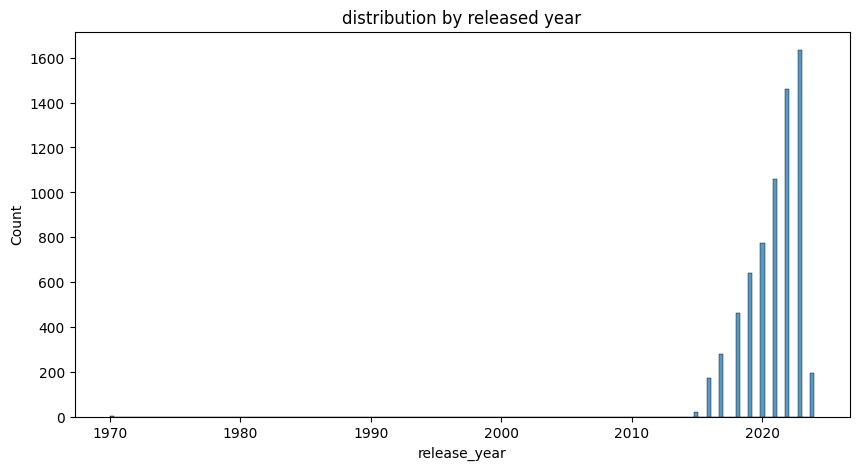

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

Text(0.5, 1.0, 'Top 10 genres')

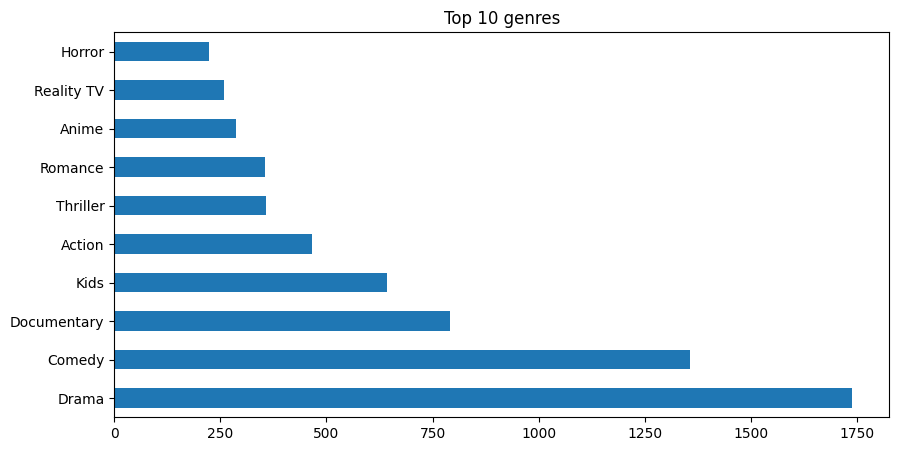

In [46]:
# Top 10 genres
plt.figure(figsize=(10,5))
df.genre.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

In [84]:
df.genre.value_counts().nlargest(3).sum()/len(df)*100

58.03224843236787

Text(0.5, 0, '')

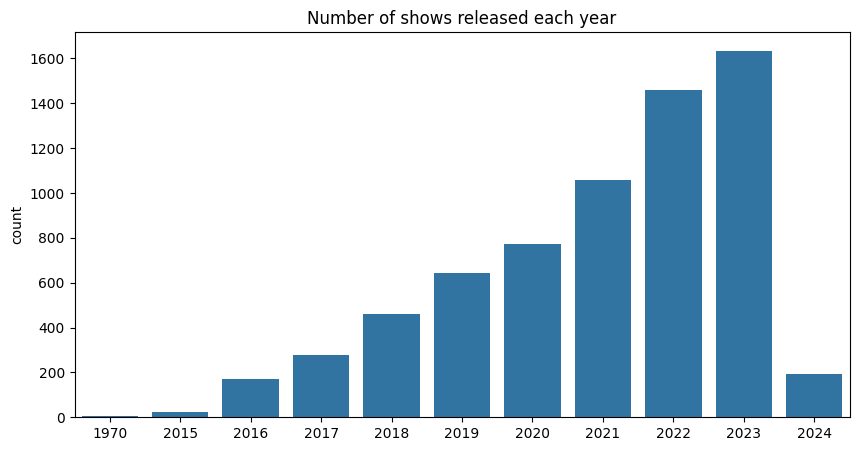

In [49]:
# Number of shows added over the years
plt.figure(figsize = (10,5))
sns.countplot(x="release_year", data=df)
plt.title('Number of shows released each year')
plt.xlabel('')

Text(0.5, 0, '')

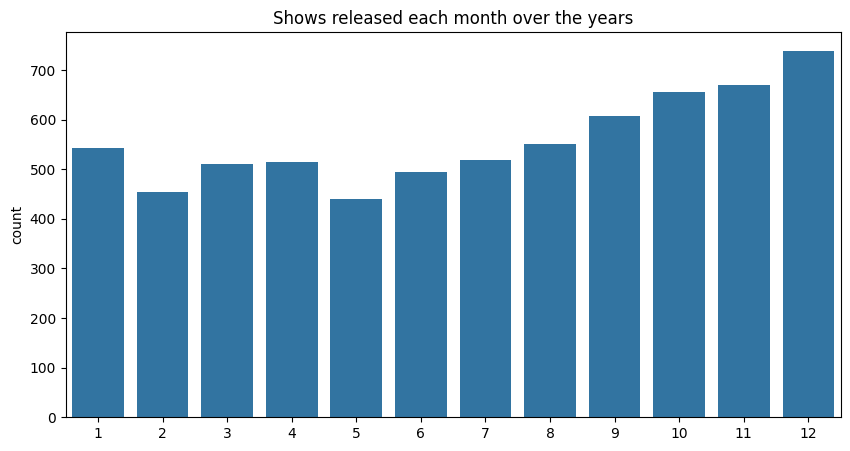

In [50]:
# Number of shows added on different months
plt.figure(figsize = (10,5))
sns.countplot(x="release_month", data=df)
plt.title('Shows released each month over the years')
plt.xlabel('')